In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('happiness.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


**data analysis**

In [4]:
df.shape

(158, 12)

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


We can see that the mean is almost near to the median and there is no much difference between 75th or 25th percentile from the max and min respecively .

So there is no skewness

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

All the datatypes are accurate

**Check for null values**

In [7]:
#checking for missing values

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

So this tells that there are no null values in our data

**separate the catrgorical and numerical columns**

In [8]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

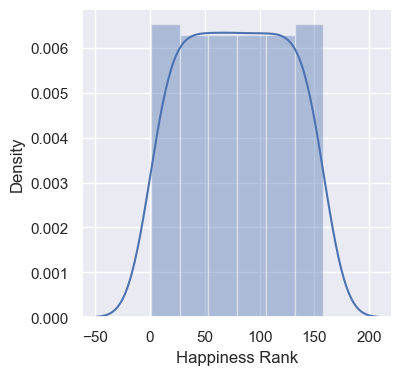

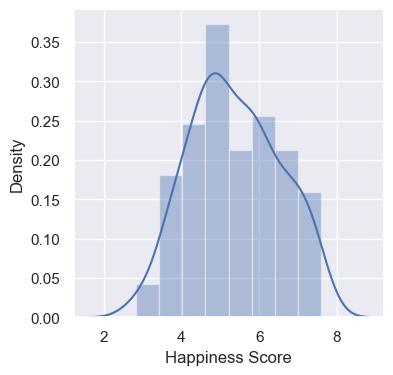

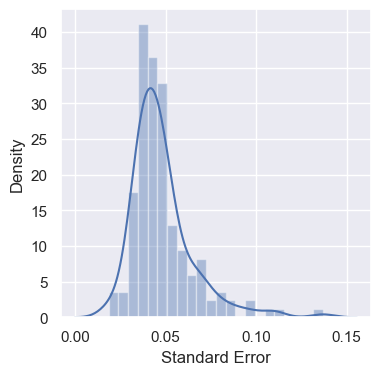

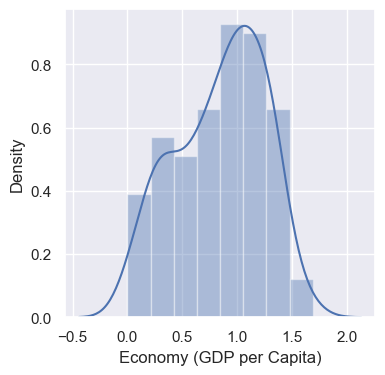

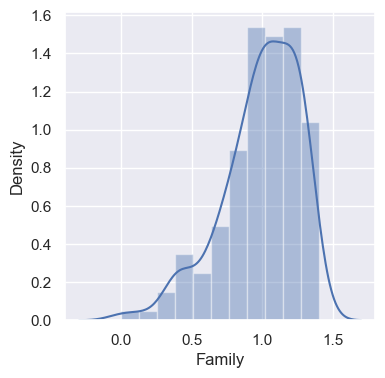

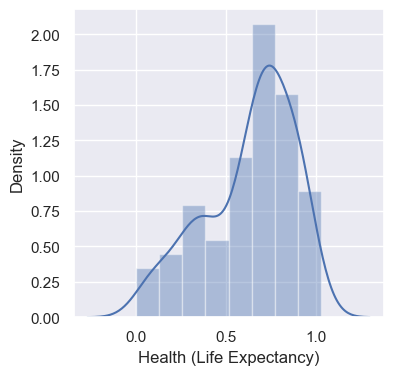

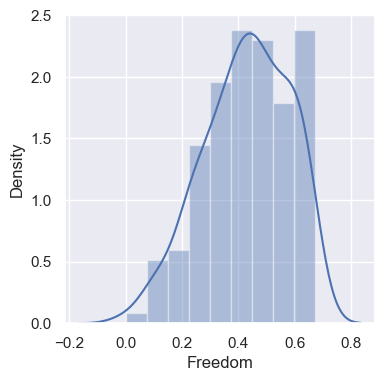

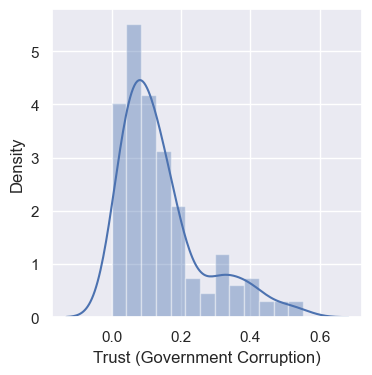

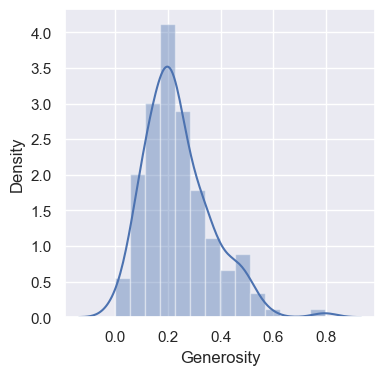

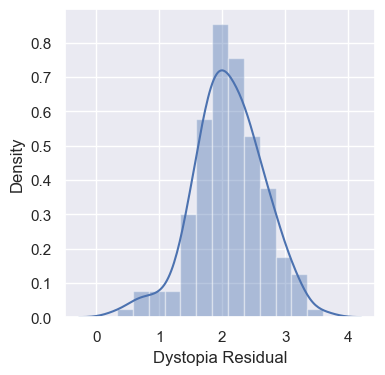

In [9]:
for i in numerical_cols:
    sns.set()#gives grids in background
    plt.figure(figsize=(4,4))
    sns.distplot(df[i])
    plt.show()

We can see there is no much skewness in the above distplots

**Check for outliers**

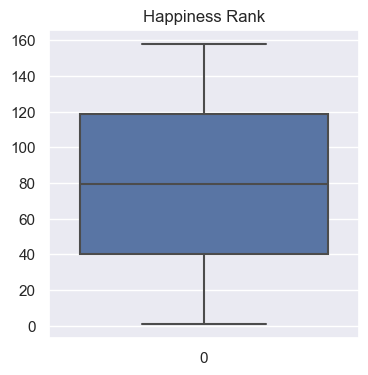

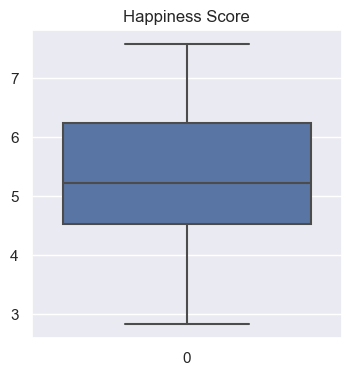

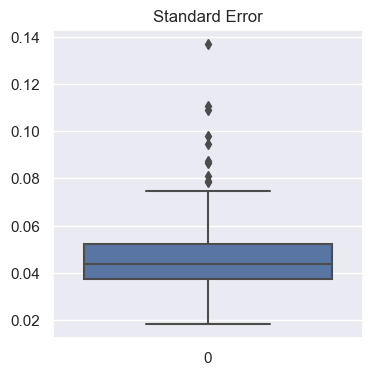

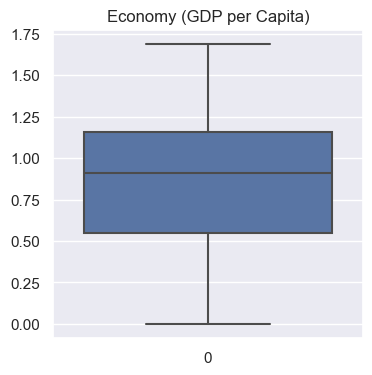

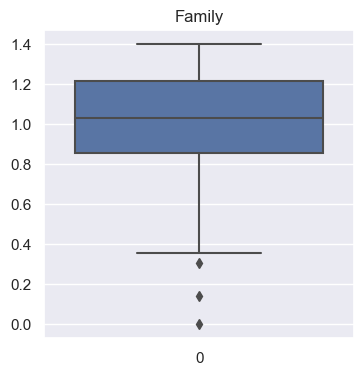

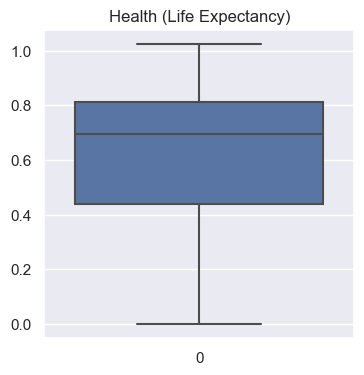

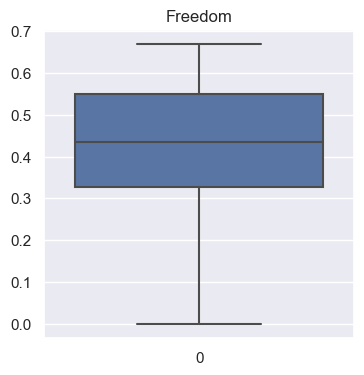

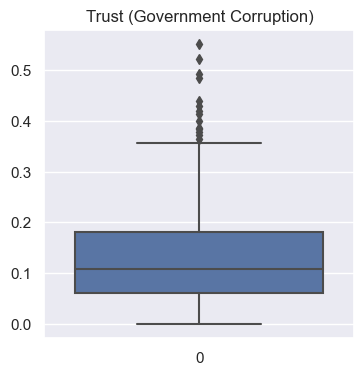

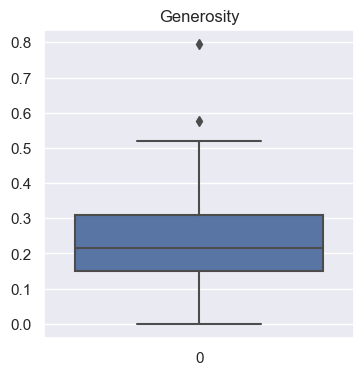

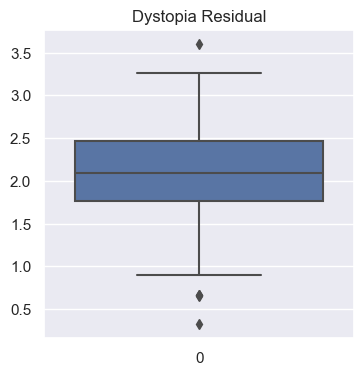

In [10]:
for i in numerical_cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

So there are outliers present

The outliers should be removed

In [11]:

for i in numerical_cols:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df.copy()
    
    new_df[i]=np.where(new_df[i] > upperl , upperl ,
                               np.where(new_df[i] <lowl, lowl ,new_df[i]
                                       )
                               )
    df[i]=new_df[i]

-77.5
236.5
1.949374999999999
8.820375000000002
0.014718750000000006
0.07484874999999999
-0.3731525000000001
2.0774075
0.32044875000000017
1.7507787499999998
-0.11855625000000009
1.3687537500000002
-0.0028137499999999482
0.8802362499999999
-0.11619499999999996
0.35812499999999997
-0.08844250000000001
0.5488775
0.7049024999999998
3.5169225


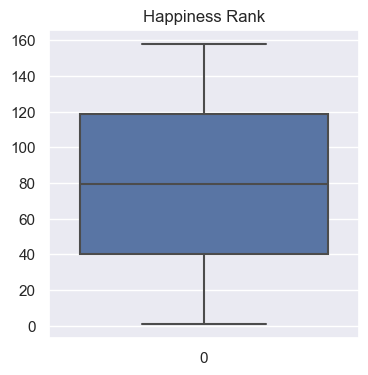

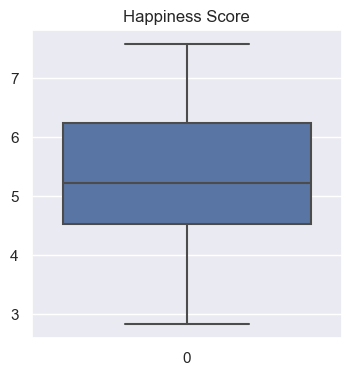

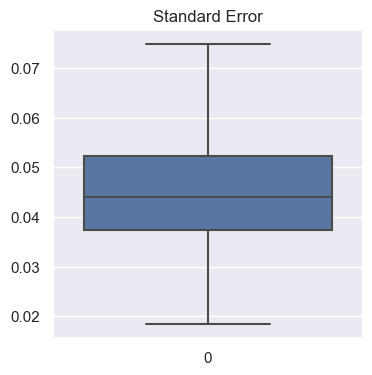

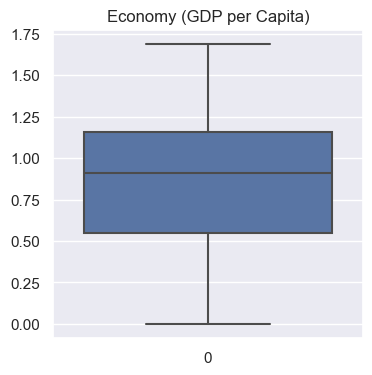

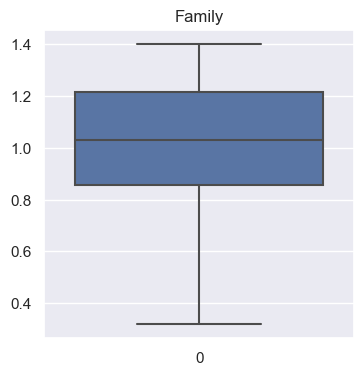

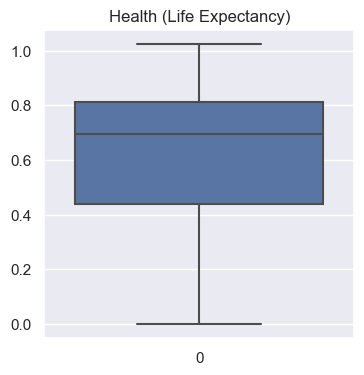

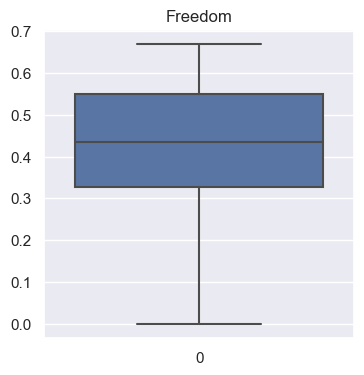

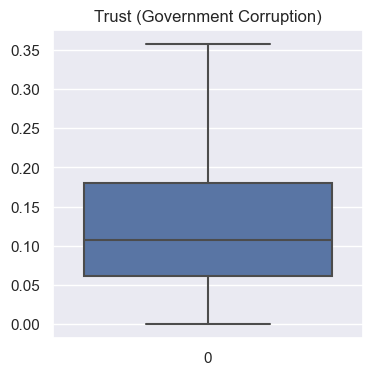

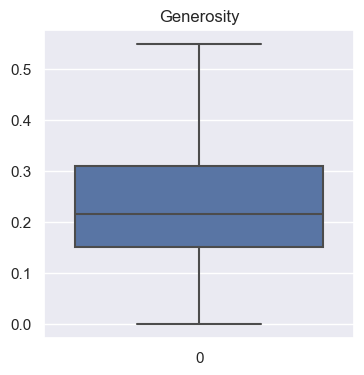

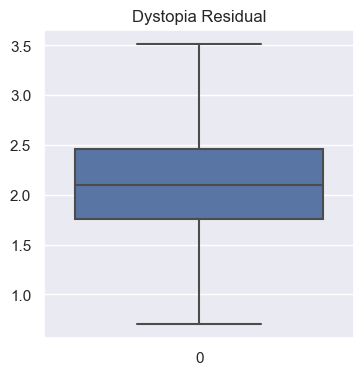

In [12]:
for i in numerical_cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

ALl the outliers have been removed

In [13]:
df.shape

(158, 12)

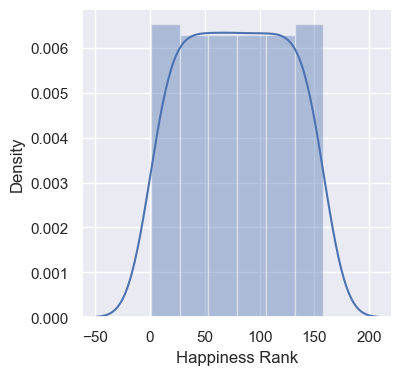

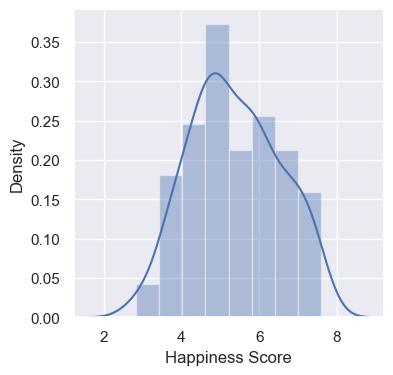

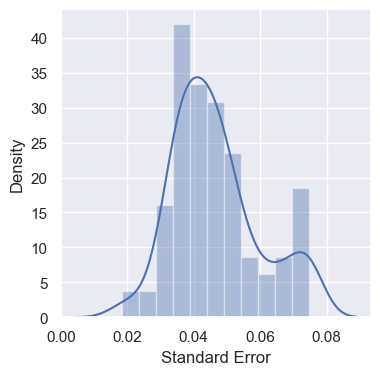

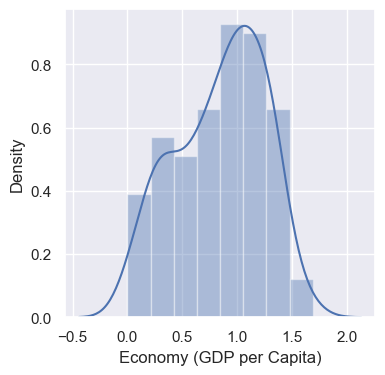

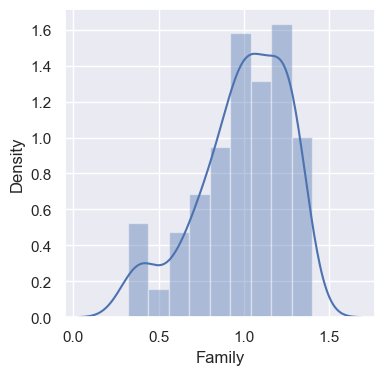

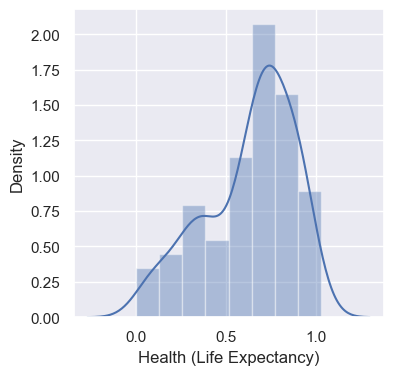

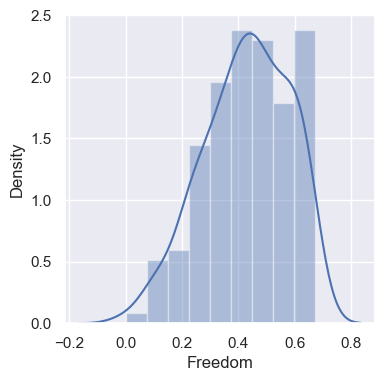

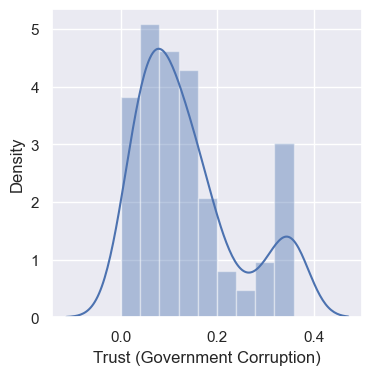

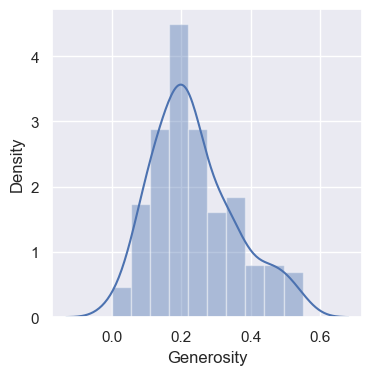

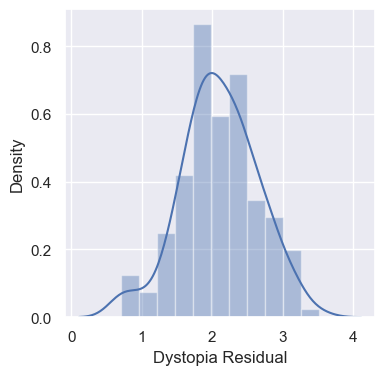

In [14]:
for i in numerical_cols:
    sns.set()#gives grids in background
    plt.figure(figsize=(4,4))
    sns.distplot(df[i])
    plt.show()

As the country and region does not have that much effect on the target it can be dropped

In [15]:
df.drop(categorical_cols,axis=1,inplace=True)

In [16]:
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.0,7.587,0.034110,1.39651,1.349510,0.94143,0.66557,0.358125,0.29678,2.517380
1,2.0,7.561,0.048840,1.30232,1.402230,0.94784,0.62877,0.141450,0.43630,2.702010
2,3.0,7.527,0.033280,1.32548,1.360580,0.87464,0.64938,0.358125,0.34139,2.492040
3,4.0,7.522,0.038800,1.45900,1.330950,0.88521,0.66973,0.358125,0.34699,2.465310
4,5.0,7.427,0.035530,1.32629,1.322610,0.90563,0.63297,0.329570,0.45811,2.451760
...,...,...,...,...,...,...,...,...,...,...
153,154.0,3.465,0.034640,0.22208,0.773700,0.42864,0.59201,0.358125,0.22628,0.704902
154,155.0,3.340,0.036560,0.28665,0.353860,0.31910,0.48450,0.080100,0.18260,1.633280
155,156.0,3.006,0.050150,0.66320,0.474890,0.72193,0.15684,0.189060,0.47179,0.704902
156,157.0,2.905,0.074849,0.01530,0.415870,0.22396,0.11850,0.100620,0.19727,1.833020


**Feature selection**

In [17]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.208155,-0.785267,-0.741520,-0.735613,-0.556886,-0.386326,-0.180778,-0.522093
Happiness Score,-0.992105,1.000000,-0.227659,0.780966,0.746684,0.724200,0.568211,0.408790,0.200097,0.528834
Standard Error,0.208155,-0.227659,1.000000,-0.238071,-0.153450,-0.340113,-0.171484,-0.163425,-0.104215,0.042574
Economy (GDP per Capita),-0.785267,0.780966,-0.238071,1.000000,0.647390,0.816478,0.370300,0.308857,0.007177,0.038543
Family,-0.741520,0.746684,-0.153450,0.647390,1.000000,0.526748,0.458894,0.216431,0.105980,0.152568
Health (Life Expectancy),-0.735613,0.724200,-0.340113,0.816478,0.526748,1.000000,0.360477,0.247046,0.120891,0.020947
Freedom,-0.556886,0.568211,-0.171484,0.370300,0.458894,0.360477,1.000000,0.495024,0.390296,0.057050
Trust (Government Corruption),-0.386326,0.408790,-0.163425,0.308857,0.216431,0.247046,0.495024,1.000000,0.290557,-0.003508
Generosity,-0.180778,0.200097,-0.104215,0.007177,0.105980,0.120891,0.390296,0.290557,1.000000,-0.081867
Dystopia Residual,-0.522093,0.528834,0.042574,0.038543,0.152568,0.020947,0.057050,-0.003508,-0.081867,1.000000


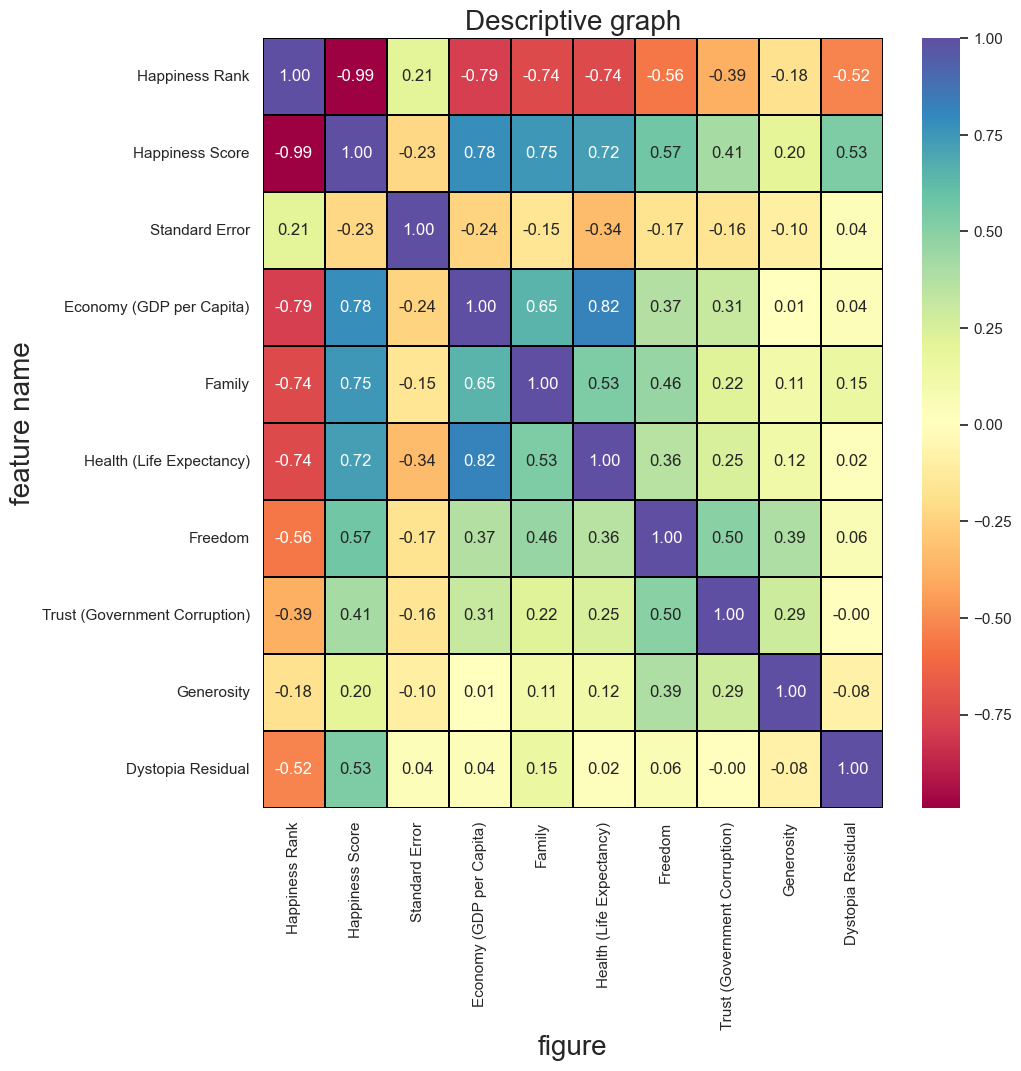

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

In [19]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
correlation(df,0.8)

{'Happiness Score', 'Health (Life Expectancy)'}

In [21]:
df.drop(['Health (Life Expectancy)','Happiness Rank'],axis=1,inplace=True)

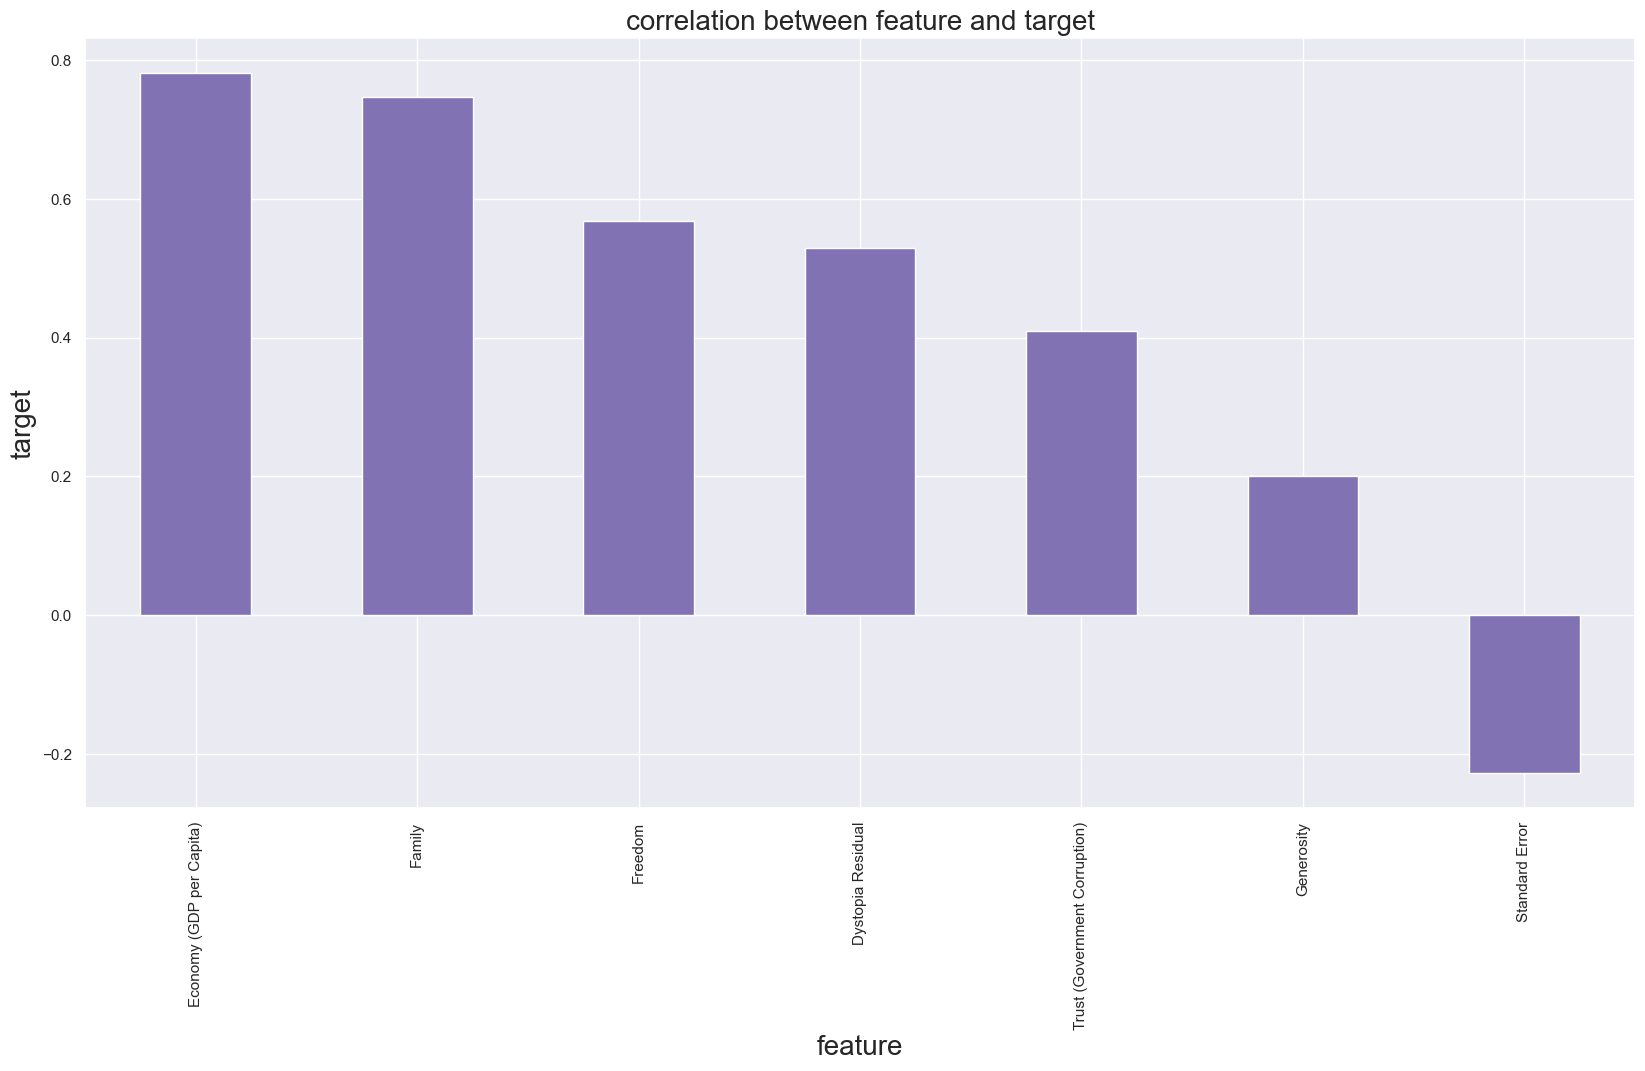

In [22]:
plt.figure(figsize=(20,10))
df.corr()['Happiness Score'].sort_values(ascending = False).drop(['Happiness Score']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=20)
plt.ylabel('target',fontsize=20)
plt.title('correlation between feature and target',fontsize=20)
plt.show()

In [23]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.034110,1.39651,1.349510,0.66557,0.358125,0.29678,2.517380
1,7.561,0.048840,1.30232,1.402230,0.62877,0.141450,0.43630,2.702010
2,7.527,0.033280,1.32548,1.360580,0.64938,0.358125,0.34139,2.492040
3,7.522,0.038800,1.45900,1.330950,0.66973,0.358125,0.34699,2.465310
4,7.427,0.035530,1.32629,1.322610,0.63297,0.329570,0.45811,2.451760
...,...,...,...,...,...,...,...,...
153,3.465,0.034640,0.22208,0.773700,0.59201,0.358125,0.22628,0.704902
154,3.340,0.036560,0.28665,0.353860,0.48450,0.080100,0.18260,1.633280
155,3.006,0.050150,0.66320,0.474890,0.15684,0.189060,0.47179,0.704902
156,2.905,0.074849,0.01530,0.415870,0.11850,0.100620,0.19727,1.833020


In [24]:
x=df.drop(['Happiness Score'],axis=1)
y=df['Happiness Score']

**Scaling of parameters**

In [25]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[-0.95408834,  1.36962124,  1.35762798, ...,  2.13372468,
         0.50892093,  0.76787295],
       [ 0.17673234,  1.13522625,  1.55914192, ...,  0.04324441,
         1.66872279,  1.10882919],
       [-1.01780736,  1.19286069,  1.39994132, ...,  2.13372468,
         0.87975494,  0.72107757],
       ...,
       [ 0.27730091, -0.45524543, -1.98546995, ...,  0.50258566,
         1.96374407, -2.57922943],
       [ 2.17342157, -2.06756644, -2.21106465, ..., -0.35068341,
        -0.3182858 , -0.49593473],
       [ 1.59160166, -1.58633379, -2.57579743, ..., -0.28613829,
        -0.57149369, -0.98671375]])

**Find best Model**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [47]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.9921519053525828
random state  65


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [49]:
def Regression(lr,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=65)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print("R2 score for test data:",r2_score(y_test,pred_test))
    print("R2 score train data :",r2_score(y_train,pred_train)*100)
    print("Mean absolute error:",mean_absolute_error(y_test,pred_test))
    print("Mean squared error:",mean_squared_error(y_test,pred_test))
    print("Root Mean squared error:",np.sqrt(mean_absolute_error(y_test,pred_test)))

In [50]:
lr=LinearRegression()
Regression(lr,x,y)

R2 score for test data: 0.9921519053525828
R2 score train data : 98.04042181484472
Mean absolute error: 0.0837339161806618
Mean squared error: 0.01018044021666899
Root Mean squared error: 0.2893681326280795


In [51]:
lr=RandomForestRegressor()
Regression(lr,x,y)

R2 score for test data: 0.9267176807261005
R2 score train data : 98.229561829777
Mean absolute error: 0.22790833333333305
Mean squared error: 0.09506081460833342
Root Mean squared error: 0.4773974584487574


In [52]:
lr=DecisionTreeRegressor()
Regression(lr,x,y)

R2 score for test data: 0.8064385624658967
R2 score train data : 100.0
Mean absolute error: 0.4214791666666668
Mean squared error: 0.25108522916666676
Root Mean squared error: 0.6492142686869004


In [53]:
lr=KNN()
Regression(lr,x,y)

R2 score for test data: 0.9038248596037134
R2 score train data : 90.73569906994175
Mean absolute error: 0.27607500000000007
Mean squared error: 0.12475706666666675
Root Mean squared error: 0.5254283966441099


In [54]:
lr=Ridge()
Regression(lr,x,y)

R2 score for test data: 0.9922881921767385
R2 score train data : 98.03567705500683
Mean absolute error: 0.08281225164377935
Mean squared error: 0.010003650826636165
Root Mean squared error: 0.28777117931401563


In [55]:
lr=Lasso()
Regression(lr,x,y)

R2 score for test data: -0.009768458915266232
R2 score train data : 0.0
Mean absolute error: 0.9491875000000002
Mean squared error: 1.3098577285950412
Root Mean squared error: 0.974262541618018


Out of these the linear regression is giving good results

In [56]:
from sklearn.model_selection import GridSearchCV

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=65)

model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False], 
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'fit_intercept': True}
Best Score: nan
Test Set Score: 0.9921519053525828


**check how the model is working**

In [59]:
def Predictor(lr,x,y,input_data):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=139)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    input_data_array=np.asarray(input_data)
    reshapedarray=input_data_array.reshape(1,-1)
    prediction=lr.predict(reshapedarray)
    print(prediction)

In [60]:
input_data=(0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176)
lr=LinearRegression()
Predictor(lr,x,y,input_data)

[7.477779]


In [61]:
import pickle

In [63]:
filename='Happiness.pkl'
pickle.dump(lr,open(filename,'wb'))


**So the model is saved**